In [1]:
# Lab 1
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


sp.init_printing()

In [2]:
t = sp.symbols('t')
x = sp.Function('x')(t)
dx1 = sp.diff(x, t) 

In [3]:
F = t**2*dx1**2
F

In [4]:
dFdx = sp.diff(F, x)
dFdx1 = sp.diff(F, dx1)
dFdx1dt = sp.diff(dFdx1, t)

In [5]:
t0, x0, t1, x1 = (-1, -1, 1, 1) 

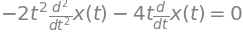

In [6]:
Euler = sp.Eq(dFdx - dFdx1dt, 0)
Euler

In [7]:
initial_conditions_0 = {t: t0, x: x0}
initial_conditions_1 = {t: t1, x: x1}

In [8]:
# print('Euler equation solution: ')
sol_Euler = sp.dsolve(Euler, x)
sol_Euler

In [9]:
eq_1 = sol_Euler.subs(initial_conditions_0)
eq_2 = sol_Euler.subs(initial_conditions_1)

In [10]:
C1, C2 = (eq_1.free_symbols)

In [11]:
C1_val, C2_val = tuple(*sp.linsolve([eq_1, eq_2], C1, C2))
C1_val

In [12]:
C2_val

In [13]:
extremal = sol_Euler.subs([(C1, C1_val), (C2, C2_val)])
extremal

# Проверка если х(-1) = -1 и х(1) = 1
# extremal_func = sp.lambdify([t, x], extremal)
# print(extremal_func(1, 1)) ==> True 

In [14]:
extremal_func = sp.lambdify([t, C1, C2], sol_Euler.rhs, 'numpy')

In [15]:
t0_t1 = np.linspace(t0, t1, 100)
x0_x1 = extremal_func(t0_t1, C1_val, C2_val)

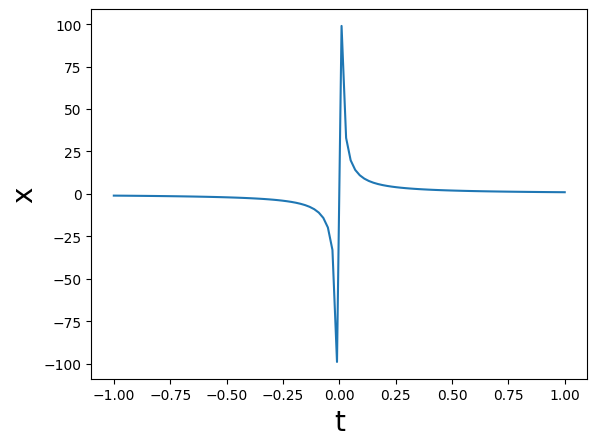

In [16]:
plt.plot(t0_t1, x0_x1)
plt.xlabel('t', fontsize=20)
plt.ylabel('x', fontsize=20)
plt.show()